<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agrupamento;</li>
  <li>Dados;</li>
  <li>Treino;</li>
  <li>Avaliação;</li>
  <li>Predição.</li>
</ol>

---

# **Exercícios**

## 1\. iris


Neste exercício, vamos utilizar uma base de dados com informações sobre flores do gênero iris. A idéia é agrupar as flores de acordo com suas características físicas (variáveis preditivas). Lembre-se das aulas, nós já temos uma idéia dos agrupamentos.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris = iris.drop(['species'], axis=1)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### **1.1. Analise exploratoria**

Utilize os gráficos abaixo para entender melhor a relação entre os atributos da base de dados. Comente o que observou no gráfico.

 - Atributos preditivos:

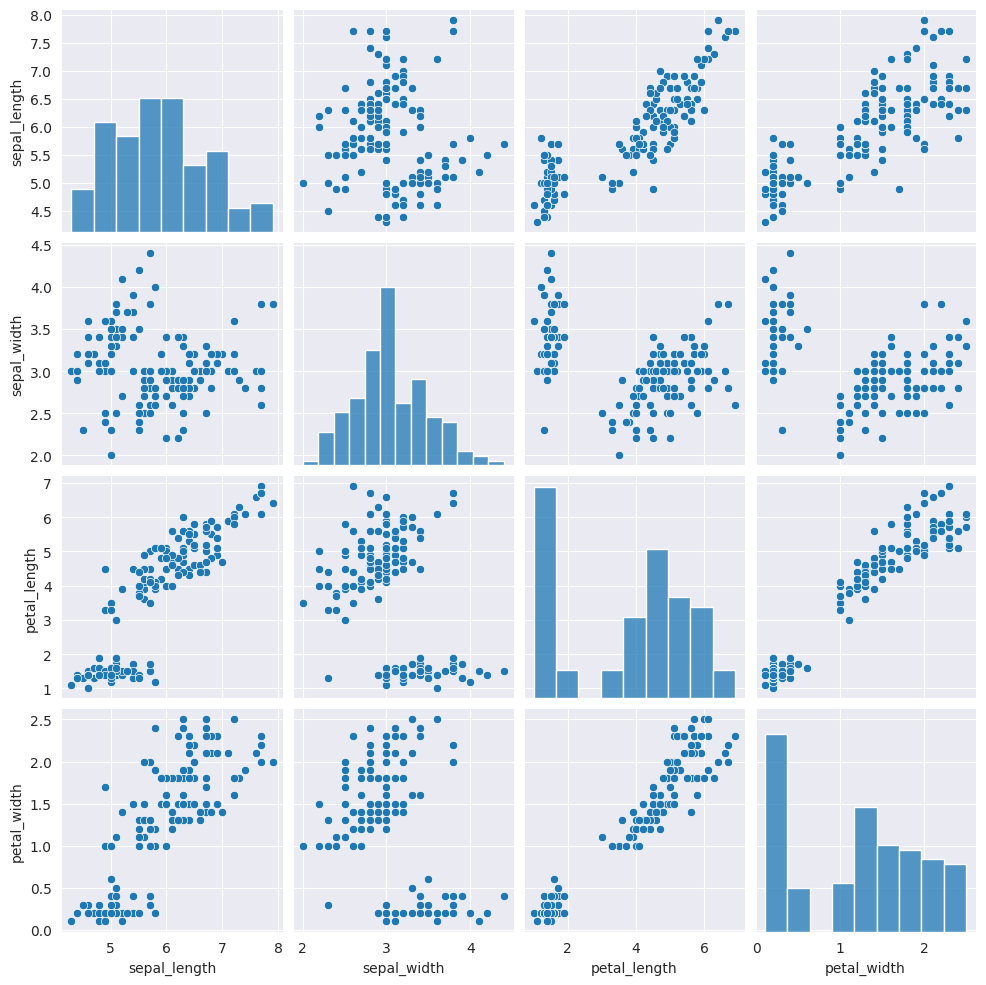

In [9]:
with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris)

**Comentário:**

em praticamente toos os grafico parecem haver uma
separação clara que imagino ser a especie de flor
menor "setosa".


## 2\. Dados

### **2.1. Valores nulos**

Avalie se a base de dados possui valores faltantes, se sim, utilize os conceitos da aula para trata-los.

In [16]:
# resposta da questão 2.1
x=iris.isnull().sum()
print("o numero de nulos em cada atributo é\n",x)

o numero de nulos em cada atributo é
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


### **2.2. Variáveis numéricas**

Identifique se existe a necessidade de escalar as variáveis numéricas. Se sim, crie uma nova coluna **padronizando** seus valores. A nova coluna deve ter o mesmo nome da coluna original acrescidade de "*_std*".

> **Nota**: Você não deve tratar a variável resposta.

In [ ]:
# resposta da questão 2.2
print('as variaveis numericas ja estão padronizadas')

### **2.3. Limpeza**

Caso você tenha escalado suas variáveis, descarte as colunas originais e mantenha apenas as variáveis preditivas com o sufixo *_std*", *_nom*" e "*_ord*".

In [17]:
# resposta da questão 2.3
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 3\. Modelagem

### **3.1. Treino**

Treine 10 modelos de **k-médias** variando o número de clusters de 1 a 10. Para cada modelo treinado, salve o valor global do **wcss** em uma lista.

In [19]:
# resposta da questão 3.1
from sklearn.cluster import KMeans
model = KMeans()

In [20]:
wcss = []

for k in range(1, 11):

  model = KMeans(n_clusters=k)
  model = model.fit(iris)
  wcss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

### **3.2. Avaliação**

Gere um gráfico de linha dos valores do **wcss** pelo **número de clusters**. Utilize o método do cotovelo para decidir o número final de clusters.

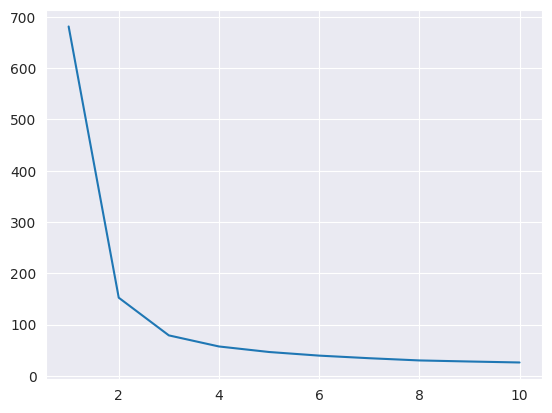

In [ ]:
with sns.axes_style('darkgrid'):

  grafico = sns.lineplot(x=range(1, 11), y=wcss)

### **3.3. Visualização**

**a)** Utilizando o número de clusters final, adicione uma coluna chamada **cluster** no dataframe **iris** com o número do cluster que cada flor foi alocada.

In [22]:
# resposta da questão 3.3.a
model = KMeans(n_clusters=3)
model = model.fit(iris)
iris['cluster'] = model.predict(iris)
iris.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**b)** Gere a mesma visualização da sessão 1.1, agora passando como atributo **hue** a coluna **cluster**. Comente os resultados com base no valor esperado do número de clusters.

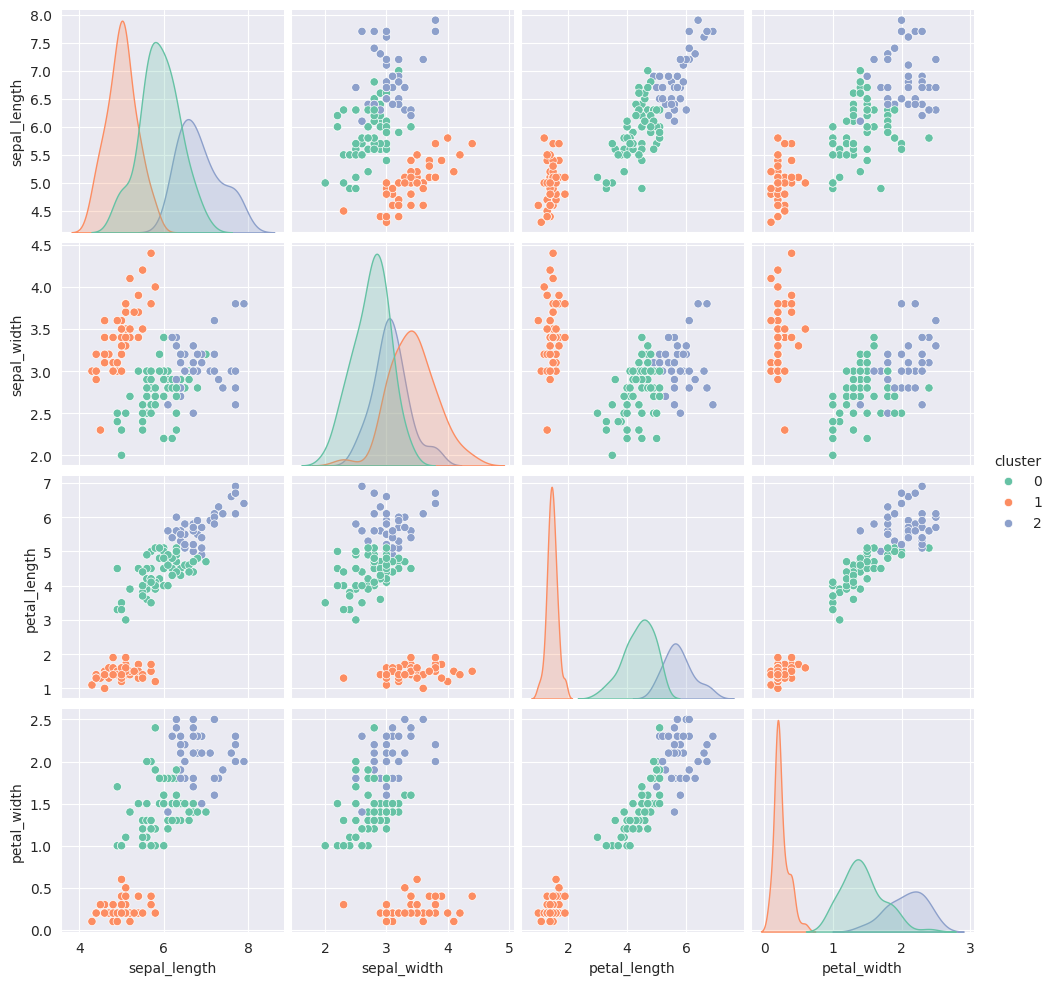

In [24]:
# resposta da questão 3.3.b
with sns.axes_style('darkgrid'):

  grafico = sns.pairplot(data=iris, hue='cluster',palette='Set2')


**Comentário:**

o agrupamento parece ter sido feito nas especie embora seja uma informação que o algoritomo não sabia o mesmo consegui distiguir e agrupar plantas semelhantes.

## 4\. Predição  

### **4.1. Nova flor**

Em qual cluster a flor abaixo seria alocada?


| sepal_length	| sepal_width | petal_length | petal_width |
| --- | --- | --- | --- |
| 5.1 | 3.5 | 1.4 | 0.2 |

> **Atenção:** Lembre-se de pre-processar os atributos assim como nos exercício 2.2.

In [25]:
# resposta da questão 4.1
nova_flor = np.array([[5.1, 3.5, 1.4, 0.2]])
cluster=model.predict(nova_flor)
print("a flor pertence ao cluster: ",cluster)

a flor pertence ao cluster:  [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


---